# Intro to Data Science - Homework 1 - Spring 2025 - Wilmington College
## Due Date: February 7, 2025

## Q1: Climate and Environmental Data Analysis 
 
As a data scientist working in environmental research, you are analyzing climate patterns and temperature fluctuations in different regions. Your goal is to process and analyze temperature data using **NumPy operations efficiently**. 

### **1. Advanced Array Operations:**  
You have temperature readings (in Celsius) for five consecutive days from three different cities:  
```python
city1 = np.array([12, 15, 18, 20, 22])  
city2 = np.array([10, 14, 19, 23, 28])  
city3 = np.array([5, 10, 15, 20, 25])  
```
- a. **Stack** these arrays into a **2D NumPy array** where each row represents a city, and each column represents a day.  
- b. Compute the **row-wise mean** temperature for each city.  
- c. Compute the **column-wise maximum** temperature recorded on each day.  
- d. Convert all temperatures from **Celsius to Fahrenheit** using broadcasting:  
   $$
   F = C \times \frac{9}{5} + 32
   $$
- e. Identify the **index positions** where temperatures exceeded **20°C**.

In [1]:
#     **Solution**
# Type your solution here.
import numpy as np
def c2f(c):
    return (c * 1.8) + 32
city1 = np.array([12, 15, 18, 20, 22])
city2 = np.array([10, 14, 19, 23, 28])
city3 = np.array([5, 10, 15, 20, 25])
cities = (np.concatenate((city1, city2, city3))).reshape(3,5)
cities
cities.mean(axis=1)
cities.max(axis=0)
celsius = c2f(cities)
celsius
np.where(cities > 20)

(array([0, 1, 1, 2]), array([4, 3, 4, 4]))

### Q2. Conditional Logic & Boolean Indexing:

You are given daily temperature readings for a month in a city:  

```python
monthly_temps = np.random.randint(5, 35, size=30)  # Generates random temperatures between 5 and 35°C  
```  
- a. Create an array `temp_category` where temperatures **≥ 25°C** are labeled as `"Hot"`, temperatures between **15-24°C** as `"Moderate"`, and temperatures **≤ 14°C** as `"Cold"`.  

- b. Count how many days were `"Hot"`, `"Moderate"`, and `"Cold"`.  
- c. Replace all `"Cold"` days (≤ 14°C) with the mean temperature of the `"Moderate"` days.  
- d. Find the **top 3 hottest days** and their corresponding indices in `monthly_temps`.  


In [7]:
#     **Solution**
# Type your solution here.
import numpy as np
monthly_temps = np.random.randint(5, 35, size=30)
condlist = [monthly_temps>=25, monthly_temps<=14]
choicelist = ["Hot", "Cold"]
temp_category = np.select(condlist, choicelist, "Moderate")
hot = np.size(np.where(temp_category == "Hot"))
mod = np.size(np.where(temp_category == "Moderate"))
cold = np.size(np.where(temp_category == "Cold"))
print(hot)
print(mod)
print(cold)
temp_category[temp_category == "Cold"] = np.mean(mod)
indices = np.argsort(monthly_temps)[-3:]
values = monthly_temps[indices]
print("Indices:", indices)
print("Values:", values)

10
10
10
Indices: [10 23 27]
Values: [32 32 32]


### Q3. Statistical & Mathematical Operations:

Given an array of test scores from an environmental science class:  

```python
scores = np.array([78, 85, 92, 88, 76, 95, 89, 83, 90, 87])  
```  
- a. Compute the **mean, median, standard deviation, and variance** of the scores.  
- b. Determine the **25th and 75th percentile** of the scores.  
- c. Normalize the test scores to be between **0 and 1** using min-max scaling:  
   $$
   X_{\text{norm}} = \frac{X - \min(X)}{\max(X) - \min(X)}
   $$
- d. Apply **boolean indexing** to extract test scores greater than one standard deviation above the mean.  



In [32]:
#     **Solution**
# Type your solution here.
import numpy as np
scores = np.array([78, 85, 92, 88, 76, 95, 89, 83, 90, 87])
mean = np.mean(scores)
median = np.median(scores)
sd = np.std(scores)
var = np.var(scores)
twenty_fifth = np.percentile(scores, 25)
twenty_fifth
seventy_fifth = np.percentile(scores, 75)
seventy_fifth
min_val = np.min(scores)
max_val = np.max(scores)
scaled_scores = (scores - min_val) / (max_val - min_val)
scores[scaled_scores > 1]
print(mean)
print(median)
print(sd)
print(var)
print(twenty_fifth)
print(seventy_fifth)
print(scaled_scores)


86.3
87.5
5.657738063926255
32.010000000000005
83.5
89.75
[0.10526316 0.47368421 0.84210526 0.63157895 0.         1.
 0.68421053 0.36842105 0.73684211 0.57894737]


### Q4. Linear Algebra & Matrix Transformations:

You are given two matrices representing different climate models:  

```python
climate_model1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  
climate_model2 = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])  
```  
- a. Compute the **dot product** of `climate_model1` and `climate_model2`.  
- b. Find the **determinant** of `climate_model1`.  
- c. Compute the **eigenvalues and eigenvectors** of `climate_model1`.  
- d. Reshape `climate_model1` into a **1D array**.  
- e. Extract the **diagonal elements** of `climate_model1`.  


In [39]:
#     **Solution**
# Type your solution here.
climate_model1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
climate_model2 = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])
np.dot(climate_model1, climate_model2)
np.linalg.det(climate_model1)
np.linalg.det(climate_model2)
climate_model1.reshape(-1)
np.diag(climate_model1)

array([1, 5, 9])


### Q5. Random Walk Simulation - Extreme Temperature Changes:

Simulate a **temperature fluctuation model** for a **random city over 365 days**. Start at **20°C**, and at each step, the temperature can change randomly by **±1, ±2, or ±3°C**.  
- a. Generate a **random walk** of 365 steps using `np.random.choice([-3, -2, -1, 1, 2, 3], size=365)`.  
- b. Compute the **maximum deviation** from the starting temperature.  
- c. Find how many times the temperature dropped below **10°C**.  
- d. Plot the temperature fluctuation over time.  
- e. Modify the step distribution to use **normally distributed** temperature variations using `rng.standard_normal` with a mean of **0** and standard deviation of **2**.  



array([17.15234993, 19.67980684, 17.93848337, 17.4201369 , 17.26945028,
       15.78768098, 13.05209558, 14.34988118, 15.07199741, 11.16627128,
       15.86109059, 17.7980844 , 16.27931004, 18.08370659, 17.14980024,
       17.0284212 , 18.60610989, 16.09277363, 17.24448866, 20.04244664,
       22.68704277, 22.08764574, 23.89348442, 20.65031895, 20.33394043,
       21.23290829, 18.54570615, 18.38233097, 21.83181083, 27.06812968,
       28.62285237, 30.28011876, 28.36214214, 25.94336556, 23.11878154,
       24.2018752 , 25.70575399, 24.38823335, 21.93088338, 22.44599891,
       23.07180475, 22.81018137, 25.35014761, 25.1642227 , 25.03192092,
       22.81549198, 23.08740568, 25.78156121, 25.90384925, 26.04567846,
       26.91298753, 27.46795485, 28.52845962, 29.60190156, 30.83860159,
       29.24856668, 29.84862857, 26.64322539, 27.17682305, 24.65357548,
       24.51103387, 25.45913333, 24.62942581, 24.82485881, 21.54402313,
       19.82950549, 21.20606906, 18.8970099 , 20.19791467, 17.42

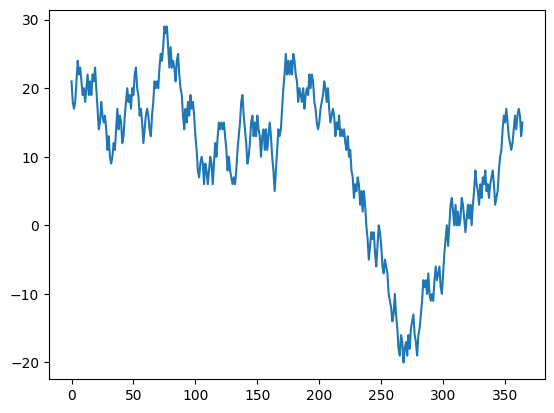

In [43]:
#     **Solution**
# Type your solution here.
import numpy as np
import matplotlib.pyplot as plt 
steps = np.random.choice([-3, -2, -1, 1, 2, 3], size=365)
walk = steps.cumsum()
temp = walk + 20
walk.max()
counter = 0
for value in temp:
    if value < 10:
        counter += 1
counter
plt.plot(temp)
rng = np.random.default_rng(seed=12345)
new_steps = rng.normal(0, 2, size=365)
new_walk = new_steps.cumsum()
new_temp = new_walk + 20
new_temp

### Q6  
Given a 2D NumPy array of temperature readings from 5 cities over 10 days: 
 
```python
temps_2d = np.random.randint(10, 40, size=(5, 10))  
```  
- a. Find the **city with the highest average temperature**.  
- b. Find the **day with the lowest recorded temperature**.  
- c. Replace any temperature above **35°C** with the **average of its row**.  


In [45]:
#     **Solution**
# Type your solution here.
import numpy as np
temps_2d = np.random.randint(10, 40, size=(5, 10))
print(temps_2d)
avg_city_temps = np.mean(temps_2d, axis=1)
highest_avg_index = np.argmax(avg_city_temps)
highest_avg_value = avg_city_temps[highest_avg_index]
highest_avg_value
lowest_temp = temps_2d.min()
lowest_temp_index = temps_2d.argmin()
row, col = np.unravel_index(lowest_temp_index, temps_2d.shape)
print(col)
row_average = np.mean(temps_2d, axis=1).reshape(5, 1)
mask = temps_2d > 35
np.where(mask, row_average, temps_2d)

[[19 37 10 32 19 10 17 14 38 21]
 [10 35 17 22 15 28 17 10 27 15]
 [11 28 13 22 38 37 16 32 39 31]
 [23 13 27 11 25 31 27 22 12 28]
 [38 14 31 15 21 10 22 12 13 16]]
2


array([[19. , 21.7, 10. , 32. , 19. , 10. , 17. , 14. , 21.7, 21. ],
       [10. , 35. , 17. , 22. , 15. , 28. , 17. , 10. , 27. , 15. ],
       [11. , 28. , 13. , 22. , 26.7, 26.7, 16. , 32. , 26.7, 31. ],
       [23. , 13. , 27. , 11. , 25. , 31. , 27. , 22. , 12. , 28. ],
       [19.2, 14. , 31. , 15. , 21. , 10. , 22. , 12. , 13. , 16. ]])